In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers

from keras.layers.normalization import BatchNormalization

from keras.preprocessing.image import ImageDataGenerator

from keras.utils.np_utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:520: FutureWarning: Passi

In [2]:
# import data
import gzip

image_size = 28
num_images = 60000

f = gzip.open('data\\mnist\\train-images-idx3-ubyte.gz','r')
f.read(16)
buf = f.read(image_size * image_size * num_images)
X = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
X = X.reshape(num_images, image_size, image_size, 1)

f = gzip.open('data\\mnist\\train-labels-idx1-ubyte.gz','r')
f.read(8)
y=[]
for i in range(0,num_images):   
    buf = f.read(1)
    y.append(np.frombuffer(buf, dtype=np.uint8).astype(np.int64))

data:


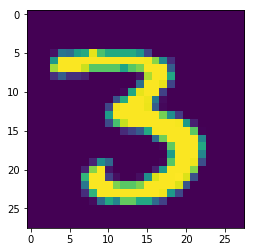

label:[3]


In [3]:
print('data:')
plt.imshow(np.asarray(X[12]).squeeze())
plt.show()
print('label:{}'.format(y[12]))

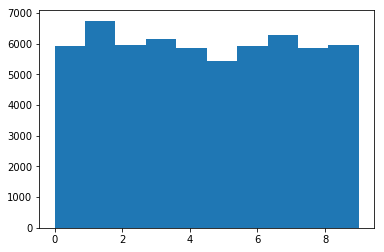

In [4]:
plt.hist(np.array(y).flatten())
plt.show()

In [5]:
# reshaping X and y
X = X.reshape(-1,28,28,1)
y = to_categorical(np.array(y).squeeze())

In [20]:
# splitting data into train, test and validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=10)
print("Training Set Shape = ",X_train.shape)
print("Validation Set Shape = ",X_valid.shape)
print("Test Set Shape = ",X_test.shape)

Training Set Shape =  (43200, 28, 28, 1)
Validation Set Shape =  (10800, 28, 28, 1)
Test Set Shape =  (6000, 28, 28, 1)


In [7]:
# # Data Augmentation
# # Data augmentation is a strategy used to increase the amount of data by using techniques like cropping, padding, flipping, etc.
# # Data augmentation makes the model more robust to slight variations, and hence prevents the model from overfitting.
# # It is neither practical nor efficient to store the augmented data in memory, and that is where the ImageDataGenerator
# from keras.preprocessing.image import ImageDataGenerator
# datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1, rotation_range=10)
# X_train = datagen.flow(X_train)

In [9]:
mean = np.mean(X_train)
std = np.std(X_train)

def standardize(x):
    return (x-mean)/std

In [10]:
epochs = 50
batch_size = 64

model=Sequential()

model.add(Lambda(standardize,input_shape=(28,28,1)))    
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    
model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         147584    
__________

In [22]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=10, validation_data=(X_valid, y_valid))

Train on 43200 samples, validate on 10800 samples
Epoch 1/10
43200/43200 [==============================] - 537s 12ms/step - loss: 0.0948 - acc: 0.9718 - val_loss: 0.0713 - val_acc: 0.9787
Epoch 2/10
43200/43200 [==============================] - 567s 13ms/step - loss: 0.0454 - acc: 0.9855 - val_loss: 0.0478 - val_acc: 0.9866
Epoch 3/10
43200/43200 [==============================] - 560s 13ms/step - loss: 0.0285 - acc: 0.9911 - val_loss: 0.0512 - val_acc: 0.9866
Epoch 4/10
43200/43200 [==============================] - 562s 13ms/step - loss: 0.0275 - acc: 0.9919 - val_loss: 0.0381 - val_acc: 0.9900
Epoch 5/10
43200/43200 [==============================] - 565s 13ms/step - loss: 0.0231 - acc: 0.9930 - val_loss: 0.0720 - val_acc: 0.9834
Epoch 6/10
43200/43200 [==============================] - 436s 10ms/step - loss: 0.0219 - acc: 0.9936 - val_loss: 0.0541 - val_acc: 0.9870
Epoch 7/10
43200/43200 [==============================] - 443s 10ms/step - loss: 0.0167 - acc: 0.9948 - val_loss: 0.